In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Stock Processing

In [16]:
def load_csv(csv_path):
    with open(csv_path, 'r', newline='') as csv_fh:
        headers = csv_fh.readline().strip().split(',')
    
    data = np.loadtxt(csv_path, delimiter = ',', skiprows = 1, dtype = "U10, float, float, float, float")
    
    return headers, data

In [53]:
h, dow = load_csv("DOW.csv")
dow = np.flip(d, axis = 0)
h, sp = load_csv("SP.csv")
dow = np.flip(d, axis = 0)
h, nas = load_csv("NASDAQ.csv")
dow = np.flip(d, axis = 0)

In [69]:
def process_stocks(data):
    monthly = []
    i = 0
    
    while (i < data.shape[0]):
        chunk = data[i:i + 30]
        month = chunk[0][0][:2]
        year = chunk[0][0][-2:]
        
        avgs = [(op + cl)/2 for (date, op, high, low, cl) in chunk if date[:2] == month]
        i += len(avgs)
        monthly.append([month + "-" + year, np.mean(avgs)])
        
    return monthly

In [81]:
with open('NASDAQ_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(process_stocks(nas))

In [82]:
with open('NASDAQ_processed.csv', 'r', newline='') as csv_fh:
    headers = csv_fh.readline().strip().split(',')
    
    data = np.loadtxt('NASDAQ_processed.csv', delimiter = ',', dtype = "U5, float")

data = np.flip(data, axis = 0)
data[0]

('01-87', 384.22714286)

# Case Shiller

In [307]:
city = ["atlanta", "boston", "chicago", "cleveland", "dallas", "denver", "detroit", "la", "miami", \
        "minneapolis", "nyc", "phoenix", "portland", "sf", "seattle", "tampa", "dc"]

dates = ["01-91", "01-90", "01-90", "01-90", "01-00", "01-90", "01-91", "01-90", "01-90", "01-90", "01-87", \
        "01-02", "01-90", "01-90", "01-90", "01-90", "11-96"]

In [319]:
def load_case(cities, starts):
    result = []
    
    for i in range(len(cities)):
        csv_path = "Case Shiller/" + cities[i] + "_case_shiller.csv"
        data = np.loadtxt(csv_path, delimiter = ',', skiprows = 1, dtype = "U10, float")
    
        for j in range(len(data)):
            data[j][0] = data[j][0][5:7] + "-" + data[j][0][2:4]
        
        print(check_months(months, data))
        ind = 0
        while (data[ind][0] != starts[i]):
            ind += 1
        
        data = data[ind:]
        data = [[cities[i], date, val] for (date, val) in data]
        
        result += data
    
    return result

In [320]:
case_shiller_data = load_case(city, dates)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [326]:
with open('Case_Shiller_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(case_shiller_data)

# Patents

In [303]:
def del_day(data):
    cdata = [[a, b] for (a, b) in data]
    
    for j in range(len(cdata)):
        cdata[j][0] = cdata[j][0][5:7] + "-" + cdata[j][0][2:4]
            
    return cdata

In [148]:
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

In [217]:
def check_months(m, arr):
    for i in range(len(arr) - 1):
        month1 = arr[i][0][:2]
        month2 = arr[i + 1][0][:2]
        
        year1 = int(arr[i][0][-2:])
        year2 = int(arr[i + 1][0][-2:])
        
        ind1 = m.index(month1)
        ind2 = m.index(month2)
        
        if ind1 != 11:
            if (ind2 - ind1 != 1):
                return False
            
        else:
            if ind2 != 0:
                return False
            if ((year2 - year1) % 100 != 1):
                return False
        
    return True

In [231]:
result = []

for sf in ["sf1", "sf2"]:
    csv_path = "Patents/" + sf + "_patents.csv"
    data = np.loadtxt(csv_path, delimiter = ',', skiprows = 1, dtype = "U10, U10")

    for i in range(len(data)):
        if data[i][1] == ".":
            data[i][1] = "0"
        
    data = [(date, int(float(pat))) for (date, pat) in data]
    
    ind = 0
    while (data[ind][0] != "1990-01-01"):
        ind += 1
        
    data = data[ind:]
    
    cdata = del_day([[x, y] for (x, y) in data])
    
    print(check_months(months, cdata))
    
    print(len(data), data[-1])
    
    result.append(data)

True
372 ('2020-12-01', 2)
True
372 ('2020-12-01', 81)


In [321]:
def load_pat(cities, starts):
    result = []
    
    for i in range(len(cities)):
        csv_path = "Patents/" + cities[i] + "_patents.csv"
        data = np.loadtxt(csv_path, delimiter = ',', skiprows = 1, dtype = "U10, U10")
        
        for k in range(len(data)):
            if data[k][1] == ".":
                data[k][1] = "0"
    
        data = [[date, int(float(pat))] for (date, pat) in data]
    
        for j in range(len(data)):
            data[j][0] = data[j][0][5:7] + "-" + data[j][0][2:4]
        
        print(check_months(months, data))
        
        ind = 0
        while (data[ind][0] != starts[i]):
            ind += 1
        
        data = data[ind:]
        data = [[cities[i], date, val] for (date, val) in data]
        
        result += data
    
    return result

In [322]:
full_patents = load_pat(city, dates)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [318]:
with open('Patents_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(full_patents)

# Population

In [292]:
def annual_linear(m, datin):
    monthly = []
    
    for i in range(len(datin) - 1):
        year = datin[i][0][:5]
        one = datin[i][1]
        two = datin[i + 1][1]
        
        for j in range(len(m)):
            date = year + months[j] + "-01"
            pop = one + (j / len(months)) * (two - one)
            
            monthly.append((date, pop))
        
    return monthly

In [323]:
def load_pop(cities, starts):
    result = []
    
    for i in range(len(cities)):
        csv_path = "Population/" + cities[i] + "_pop.csv"
        data = np.loadtxt(csv_path, delimiter = ',', skiprows = 1, dtype = "U10, float")
    
        data = annual_linear(months, data)
    
        data = del_day(data)
        
        print(check_months(months, data))
        
        ind = 0
        while (data[ind][0] != starts[i]):
            ind += 1
        
        data = data[ind:]
        data = [[cities[i], date, val] for (date, val) in data]
        
        result += data
    
    return result

In [324]:
full_pop = load_pop(city, dates)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [325]:
with open('Population_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(full_pop)

# General Processing

In [15]:
def process(csv_path):
    """
    Takes in a csv_path and correctly outputs an array/python list with each row formatted in the correct
    [date, value] manner. Should be able to handle FRED and BLS data.
    """
    
    arr = list()
    bls = True
    
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    num_months = ["01-", "02-", "03-", "04-", "05-", "06-", "07-", "08-", "09-", "10-", "11-", "12-"]
    
    with open(csv_path, 'r') as f:
        next(f)
        for row in f:
            row = row.strip().split(',')
            new_row = [0, 0]
            if (len(row) == 2):
                bls = False
        
            if bls:
                if (row[3][-3:] in months):
                    new_row[0] = num_months[months.index(row[3][-3:])] + row[1][2:]
                elif (row[3][-5:] == "Half1"):
                    new_row[0] = "01-" + row[1][2:]
                elif (row[3][-5:] == "Half2"):
                    new_row[0] = "07-" + row[1][2:]
                    
                new_row[1] = float(row[4])
                
            else:
                new_row[0] = row[0][5:8] + row[0][2:4]
            
                if (row[1] == "."):
                    new_row[1] = -1
                else:
                    new_row[1] = float(row[1])
        
            arr.append(new_row)
    
    return arr

def check_following(date1, date2):
    """
    Checks if two dates (formatted with our system) are consecutive
    """
    
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    
    month1 = date1[:2]
    month2 = date2[:2]
    year1 = int(date1[3:])
    year2 = int(date2[3:])
    
    ind1 = months.index(month1)
    ind2 = months.index(month2)
        
    if ind1 != 11:
        if (ind2 - ind1 != 1 or year1 != year2):
            return False
            
    else:
        if ind2 != 0:
            return False
        if ((year2 - year1) % 100 != 1):
            return False
        
    return True

def check_dates(arr):
    """
    Given an array of dates, checks if they are all consecutive
    """
    
    for i in range(len(arr) - 1):
        if (check_following(arr[i], arr[i + 1]) == False):
            return False
        
    return True

def gen_next(date):
    """
    Given a date, it generates what the next date should be
    """
    
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    
    month = months.index(date[:2])
    year = date[3:]
    
    if month == 11:
        if (int(year) == 99):
            following = "01-00"
            
        else:
            following = "01-" + str(int(year) + 1).zfill(2)
        
    else:
        following = months[month + 1] + "-" + year
    
    return following

def fill_gaps(in_arr):
    """
    If given an array with missing dates, fills in the gaps
    """
    
    arr = in_arr
    
    i = 0
    while True:
        if (i == len(arr) - 1):
            break
            
        if not check_following(arr[i][0], arr[i + 1][0]):
            row = [gen_next(arr[i][0]), -1]
            arr.insert(i + 1, row)
        
        i += 1
    
    return arr

def interpolate(in_arr):
    arr = in_arr
    
    i = 0
    while True:
        if (i == len(arr) - 1):
            break
            
        if (arr[i][1] == -1):
            j = 1
            while(arr[i + j][1] == -1):
                j += 1
                
            arr[i][1] = arr[i - 1][1] + (arr[i + j][1] - arr[i - 1][1]) / (j + 1)
        
        i += 1
    
    return arr

"""
Calling fill_gaps(process(csv_path)) should output an array with all of the dates correctly inputted and then
with missing values being -1

interpolate(fill_gaps(process(csv_path))) should output an array with all of the dates correctly inputted and data
values linearly interpolated

run check_dates([row[0] for row in arr]) to make sure that arr is formatted correctly (at least before interpolating)
"""

'\nCalling fill_gaps(process(csv_path)) should output an array with all of the dates correctly inputted and then\nwith missing values being -1\n\ninterpolate(fill_gaps(process(csv_path))) should output an array with all of the dates correctly inputted and data\nvalues linearly interpolated\n'

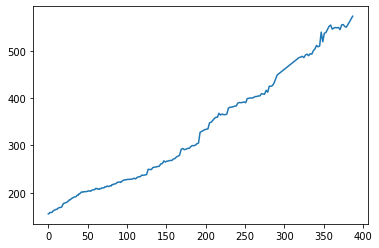

In [21]:
test = interpolate(fill_gaps(process("medical_care/sf_medical_bi_and_monthly.csv")))

plt.plot(list(range(len(test))), [row[1] for row in test])

In [23]:
check_dates([row[0] for row in test])

True

In [27]:
med_care = [("atlanta_medical_semi.csv", "atlanta_medical_bi.csv"), "boston_medical_bi.csv", "chicago_medical_monthly.csv",\
            "cleveland_medical_bi.csv", "dallas_medical_bi.csv", "dc_medical_bi.csv", "denver_medical_semi.csv",\
            "detroit_medical_bi_and_semi.csv", "la_medical_monthly.csv", "miami_medical_bi.csv",\
            "minneapolis_medical_semi.csv", "ny_medical_monthly.csv", "phoenix_medical_semi.csv",\
            "portland_medical_semi.csv", ("seattle_medical_semi.csv", "seattle_medical_mostly_bi.csv"),\
            "sf_medical_bi_and_monthly.csv", ("tampa_medical_annual.csv", "tampa_medical_semi.csv")]

motor = [("atlanta_motor_semi.csv", "atlanta_motor_monthly.csv"), "boston_motor_monthly.csv", "chicago_motor_monthly.csv",\
         "cleveland_motor_monthly.csv", "dallas_motor_monthly.csv", "dc_motor_monthly.csv", "denver_motor_semi.csv",\
         "detroit_motor_monthly.csv", "la_motor_monthly.csv", "miami_motor_monthly.csv",\
         ("minneapolis_motor_semi.csv", "minneapolis_motor_monthly.csv"), "ny_motor_monthly.csv", "phoenix_motor_semi.csv",\
         "portland_motor_semi.csv", ("seattle_motor_semi.csv", "seattle_motor_monthly.csv"), "sf_motor_monthly.csv",\
         ("tampa_motor_annual.csv", "tampa_motor_semi.csv")]

income = ["atlanta_income_annual.csv", "boston_income_annual.csv", "chicago_income_annual.csv",\
          "cleveland_income_annual.csv", "dallas_income_annual.csv", "dc_income_annual.csv", "denver_income_annual.csv",\
          "detroit_income_annual.csv", "la_income_annual.csv", "miami_income_annual.csv",\
          "minneapolis_income_annual.csv", "nyc_income_annual.csv", "phoenix_income_annual.csv",\
          "portland_income_annual.csv", "seattle_income_annual.csv", "sf_income_annual.csv", "tampa_income_annual.csv"]

food = [("atlanta_food_semi.csv", "atlanta_food_bi.csv"), "boston_food_bi.csv", "chicago_food_monthly.csv",\
        "cleveland_food_bi.csv", "dallas_food_bi.csv", "dc_food_bi.csv", "denver_food_semi.csv", "detroit_food_bi.csv",\
        "la_food_monthly.csv", "miami_food_bi.csv", "minneapolis_food_semi.csv", "ny_food_monthly.csv",\
        "phoenix_food_semi.csv", "portland_food_semi.csv", ("seattle_food_semi.csv", "seattle_food_bi.csv"),\
        "sf_food_monthly_and_bi.csv", ("tampa_food_annual.csv", "tampa_food_semi.csv")]

edu = ["atlanta_edu_monthly.csv", "boston_edu_monthly.csv", "chicago_edu_monthly.csv", "cleveland_edu_monthly.csv",\
       "dallas_edu_monthly.csv", "dc_edu_monthly.csv", "denver_edu_monthly.csv", "detroit_edu_monthly.csv",\
       "la_edu_monthly.csv", "miami_edu_monthly.csv", "minneapolis_edu_monthly.csv", "ny_edu_monthly.csv",\
       "phoenix_edu_monthly.csv", "portland_edu_monthly.csv", "seattle_edu_monthly.csv", "sf_edu_monthly.csv",\
       "tampa_edu_monthly.csv"]

In [56]:
def full_csv(folder, files):
    arr = []
    
    for file in files:
        if len(file) == 2:
            city = file[0][:file[0].index("_")]
            temp = process(folder + file[0]) + process(folder + file[1])
            data = interpolate(fill_gaps(temp))
        else:
            city = file[:file.index("_")]
            data = interpolate(fill_gaps(process(folder + file)))
        
        if city == "ny":
            city = "nyc"
        
        if not check_dates([row[0] for row in data]):
            print("error with: " + file)
            
        arr += [[city, row[0], row[1]] for row in data]
            
    return arr

def check_full(arr):
    cities = ["atlanta", "boston", "chicago", "cleveland", "dallas", "denver", "detroit", "la", "miami", \
              "minneapolis", "nyc", "phoenix", "portland", "sf", "seattle", "tampa", "dc"]

    dates = ["01-91", "01-90", "01-90", "01-90", "01-00", "01-90", "01-91", "01-90", "01-90", "01-90", "01-90", \
             "01-02", "01-90", "01-90", "01-90", "01-90", "12-97"]
    
    for i in range(len(cities)):
        temp = [row[1] for row in arr if row[0] == cities[i]]
        
        if dates[i] not in temp:
            print("missing date for: ", cities[i], dates[i])
            
        if not check_dates(temp):
            print("dates out of order for: ", cities[i])
        
    names = [row[0] for row in arr]
    
    for name in names:
        if name not in cities:
            print("cities name error: ", name)

In [59]:
medical = full_csv("medical_care/", med_care)
fuel = full_csv("motor_fuel/", motor)
inc = full_csv("per_capita_income/", income)
food_bev = full_csv("food_and_beverages/", food)
ed_health = full_csv("education_health_services/", edu)

In [60]:
check_full(medical)
print("med")
check_full(fuel)
print("fuel")
check_full(inc)
print("inc")
check_full(food_bev)
print("food")
check_full(ed_health)

med
fuel
inc
food


In [61]:
with open('Medical_care_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(medical)
    
with open('Motor_fuel_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(fuel)
    
with open('Income_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(inc)
    
with open('Food_and_beverages_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(food_bev)
    
with open('Education_and_health_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(ed_health)

In [62]:
edu_orig = list()

with open("Education_and_health_processed.csv", 'r') as f:
    for line in f:
        row = line.strip().split(',')
        
        edu_orig.append([row[0], row[1], float(row[2])])
        
pop = list()

with open("Population_processed.csv", 'r') as f:
    for line in f:
        row = line.strip().split(',')
        
        pop.append([row[0], row[1], float(row[2])])

In [67]:
cities = ["atlanta", "boston", "chicago", "cleveland", "dallas", "denver", "detroit", "la", "miami", \
              "minneapolis", "nyc", "phoenix", "portland", "sf", "seattle", "tampa", "dc"]

new_edu = list()

for city in cities:
    city_edu = [row for row in edu_orig if row[0] == city]
    city_pop = [row for row in pop if row[0] == city]
    pop_dates = [row[1] for row in city_pop]
    
    for entry in city_edu:
        if entry[1] in pop_dates:
            ratio = entry[2] / city_pop[pop_dates.index(entry[1])][2]
            div_pop = [entry[0], entry[1], ratio]
            new_edu.append(div_pop)

In [71]:
with open('Education_and_health_RATIO_processed.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(new_edu)

In [72]:
full_dates = list()

date = "01-80"

while date != "01-23":
    full_dates.append(date)
    date = gen_next(date)

In [79]:
with open('Full_dates.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for row in full_dates:
        csvwriter.writerow([row])

# CPI Edit

In [101]:
cpi = list()

with open("cpi/cpi.csv", 'r') as f:
    for line in f:
        row = line.strip().split(',')
        
        cpi.append([row[0], row[1], float(row[2])])
        
for row in cpi:
    if row[1][:3] == "010":
        row[1] = "10" + row[1][3:]
        
    if row[1][:3] == "011":
        row[1] = "11" + row[1][3:]
        
    if row[1][:3] == "012":
        row[1] = "12" + row[1][3:]

In [104]:
with open('cpi.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(cpi)

In [145]:
cpi = list()

with open("cpi/cpi.csv", 'r') as f:
    for line in f:
        row = line.strip().split(',')
        
        cpi.append([row[0], row[1], float(row[2])])
        
sf_cpi = process("cpi/sf_monthly.csv")
sf_cpi = [["sf", row[0], row[1]] for row in sf_cpi]
cpi += sf_cpi

In [148]:
with open('cpi.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(cpi)

# Combining Data

In [25]:
cities = ['atlanta', 'boston', 'chicago', 'cleveland', 'dallas', 'denver', 'detroit', 'la', 'miami',
          'minneapolis', 'nyc', 'phoenix', 'portland', 'sf', 'seattle', 'tampa', 'dc']

city_files = ['cpi/cpi.csv', 'crime/crime.csv', 'crime/all_property_crime/prop_crime.csv', 'Patents_processed.csv', 'Population_processed.csv',\
              'unemployment_processed.csv', 'Case_Shiller_processed.csv', 'Education_and_health_RATIO_processed.csv',\
              'Medical_care_processed.csv', 'Motor_fuel_processed.csv', 'Income_processed.csv',\
              'Food_and_beverages_processed.csv']

labels = ["city", "date", "cpi", "violent crime", "property crime", "patents", "population", "unemployment", "case shiller",\
          "education and health", "medical care", "motor fuel", "income", "food and bev"]

In [11]:
def find_earliest(dataset):
    all_dates = list()
    
    with open("Full_dates.csv", 'r') as f:
        cr = csv.reader(f, lineterminator = '\n')
        for line in cr:
            all_dates.append(line[0])
    
    start = ""
    dates = set([row[1] for row in dataset])
    
    for date in all_dates:
        if date in dates:
            start = date
            break
    
    return start

def find_latest(dataset):
    all_dates = list()
    
    with open("Full_dates.csv", 'r') as f:
        cr = csv.reader(f, lineterminator = '\n')
        for line in cr:
            all_dates.append(line[0])
    
    all_dates = reversed(all_dates)
    end = ""
    dates = set([row[1] for row in dataset])
    
    for date in all_dates:
        if date in dates:
            end = date
            break
    
    return end

In [12]:
earliest_dates = list()
latest_dates = list()

for city in cities:
    early_dates = list()
    late_dates = list()

    for file in city_files:
        arr = list()
        for line in open(file):
            row = line.strip().split(',')
            if row[0] == city:
                arr.append(row)
        
        early_dates.append([0, find_earliest(arr)])
        late_dates.append([0, find_latest(arr)])

    earliest_dates.append(find_latest(early_dates))
    latest_dates.append(find_earliest(late_dates))

In [13]:
dates_list = {}

for i in range(len(cities)):
    early = earliest_dates[i]
    late = latest_dates[i]
    
    full_dates = list()
    
    with open("Full_dates.csv", 'r') as f:
        cr = csv.reader(f, lineterminator = '\n')
        for line in cr:
            full_dates.append(line[0])
    
    dates_list[cities[i]] = full_dates[full_dates.index(early) : full_dates.index(late) + 1]

In [15]:
all_data = {}

for city in cities:
    all_data[city] = {}
    
    for date in dates_list[city]:
        all_data[city][date] = []
        
for city in cities:
    for file in city_files:
        arr = list()
        for line in open(file):
            row = line.strip().split(',')
            if row[0] == city:
                arr.append(row)
        
        for entry in arr:
            if entry[1] in all_data[city].keys():
                all_data[city][entry[1]] += entry[2:]

In [20]:
master_arr = list()

for city in cities:
    for date in dates_list[city]:
        master_arr.append([city, date] + all_data[city][date])

In [26]:
with open('FINAL_all_data_city_names.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(labels)
    csvwriter.writerows(master_arr)

In [27]:
one_hot = list()

for row in master_arr:
    vec = [0] * len(cities)
    vec[cities.index(row[0])] = 1
    one_hot.append(vec + row[1:])

In [29]:
with open('FINAL_all_data_one_hot.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(cities + labels[1:])
    csvwriter.writerows(one_hot)